# Applying Classification Modeling
The goal of this week's assessment is to find the model which best predicts whether or not a person will default on their bank loan. In doing so, we want to utilize all of the different tools we have learned over the course: data cleaning, EDA, feature engineering/transformation, feature selection, hyperparameter tuning, and model evaluation. 


#### Data Set Information:

This research aimed at the case of customers default payments in Taiwan and compares the predictive accuracy of probability of default among six data mining methods. From the perspective of risk management, the result of predictive accuracy of the estimated probability of default will be more valuable than the binary result of classification - credible or not credible clients. Because the real probability of default is unknown, this study presented the novel Sorting Smoothing Method to estimate the real probability of default. With the real probability of default as the response variable (Y), and the predictive probability of default as the independent variable (X), the simple linear regression result (Y = A + BX) shows that the forecasting model produced by artificial neural network has the highest coefficient of determination; its regression intercept (A) is close to zero, and regression coefficient (B) to one. Therefore, among the six data mining techniques, artificial neural network is the only one that can accurately estimate the real probability of default. 

- NT is the abbreviation for New Taiwain. 


#### Attribute Information:

This research employed a binary variable, default payment (Yes = 1, No = 0), as the response variable. This study reviewed the literature and used the following 23 variables as explanatory variables: 
- X1: Amount of the given credit (NT dollar): it includes both the individual consumer credit and his/her family (supplementary) credit. 
- X2: Gender (1 = male; 2 = female). 
- X3: Education (1 = graduate school; 2 = university; 3 = high school; 4 = others). 
- X4: Marital status (1 = married; 2 = single; 3 = others). 
- X5: Age (year). 
- X6 - X11: History of past payment. We tracked the past monthly payment records (from April to September, 2005) as follows: 
    - X6 = the repayment status in September, 2005; 
    - X7 = the repayment status in August, 2005; . . .;
    - etc...
    - X11 = the repayment status in April, 2005. 
    - The measurement scale for the repayment status is: -1 = pay duly; 1 = payment delay for one month; 2 = payment delay for two months; . . .; 8 = payment delay for eight months; 9 = payment delay for nine months and above. 
- X12-X17: Amount of bill statement (NT dollar). 
    - X12 = amount of bill statement in September, 2005;
    - etc...
    - X13 = amount of bill statement in August, 2005; . . .; 
    - X17 = amount of bill statement in April, 2005. 
- X18-X23: Amount of previous payment (NT dollar). 
    - X18 = amount paid in September, 2005; 
    - X19 = amount paid in August, 2005; . . .;
    - etc...
    - X23 = amount paid in April, 2005. 




You will fit three different models (KNN, Logistic Regression, and Decision Tree Classifier) to predict credit card defaults and use gridsearch to find the best hyperparameters for those models. Then you will compare the performance of those three models on a test set to find the best one.  


## Process/Expectations

- You will be working in pairs for this assessment

### Please have ONE notebook and be prepared to explain how you worked in your pair.

1. Clean up your data set so that you can perform an EDA. 
    - This includes handling null values, categorical variables, removing unimportant columns, and removing outliers.
2. Perform EDA to identify opportunities to create new features.
    - [Great Example of EDA for classification](https://www.kaggle.com/stephaniestallworth/titanic-eda-classification-end-to-end) 
    - [Using Pairplots with Classification](https://towardsdatascience.com/visualizing-data-with-pair-plots-in-python-f228cf529166)
3. Engineer new features. 
    - Create polynomial and/or interaction features. 
    - Additionaly, you must also create **at least 2 new features** that are not interactions or polynomial transformations. 
        - *For example, you can create a new dummy variable that based on the value of a continuous variable (billamount6 >2000) or take the average of some past amounts.*
4. Perform some feature selection. 
    
5. You must fit **three** models to your data and tune **at least 1 hyperparameter** per model. 
6. Using the F-1 Score, evaluate how well your models perform and identify your best model.
7. Using information from your EDA process and your model(s) output provide insight as to which borrowers are more likely to deafult


In [11]:
# import libraries
import pandas as pd
import sqlite3 
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
import itertools
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score, recall_score
from imblearn.over_sampling import SMOTE
from collections import Counter
from imblearn.under_sampling import TomekLinks
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
# Load libraries
import pandas as pd
from sklearn import metrics 
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn.metrics import make_scorer, accuracy_score #Import scikit-learn metrics module for accuracy calculation
from matplotlib import pyplot as plt
from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO  
from IPython.display import Image  
import pydotplus
from sklearn.model_selection import GridSearchCV
from matplotlib import pyplot as plt
import numpy as np
from sklearn.model_selection import RandomizedSearchCV  # Randomized search on hyper parameters.
from sklearn.model_selection import cross_val_score
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from scipy.stats import randint
import pandas as pd # data processing, CSV file I/O, data manipulation 
import matplotlib.pyplot as plt # this is used for the plot the graph 
import seaborn as sns # used for plot interactive graph. 
from pandas import set_option
plt.style.use('ggplot') # nice plots

from sklearn.model_selection import train_test_split # to split the data into two parts
from sklearn.linear_model import LogisticRegression # to apply the Logistic regression
from sklearn.feature_selection import RFE
from sklearn.model_selection import KFold # for cross validation
from sklearn.model_selection import GridSearchCV # for tuning parameter
from sklearn.model_selection import RandomizedSearchCV  # Randomized search on hyper parameters.
from sklearn.preprocessing import StandardScaler # for normalization
from sklearn.pipeline import Pipeline 
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.neighbors import KNeighborsClassifier #KNN
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.feature_selection import SelectFromModel
from sklearn import metrics # for the check the error and accuracy of the model
import warnings
from sklearn.utils import resample
pd.set_option('display.max_columns', 1000)
%matplotlib inline 
import warnings; warnings.simplefilter('ignore')

## 1. Data Cleaning

In [12]:
df = pd.read_csv('training_data.csv', index_col=0)

In [13]:
df.Y.value_counts()

0                             17471
1                              5028
default payment next month        1
Name: Y, dtype: int64

In [14]:
df_blah = df

In [15]:
df.sort_values(by='X1', ascending=False,inplace=True)
df.columns = df.iloc[0]
data = df[df.SEX != "SEX"]
data.rename(columns={"default payment next month": "DEFAULT"}, inplace=True)

In [16]:
data = data.astype(float)
data['EDUCATION']=np.where(data['EDUCATION']>4,4,data['EDUCATION'])
data['EDUCATION']=np.where(data['EDUCATION']<1,4,data['EDUCATION'])
data['MARRIAGE']=np.where(data['MARRIAGE']<1,3,data['MARRIAGE'])

In [17]:
data.head()

ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,DEFAULT
23626,90000.0,2.0,3.0,1.0,36.0,0.0,0.0,-1.0,0.0,0.0,0.0,79642.0,79001.0,18318.0,18982.0,19371.0,19608.0,1580.0,19789.0,1295.0,1000.0,849.0,1000.0,0.0
9489,90000.0,1.0,3.0,2.0,25.0,0.0,0.0,0.0,0.0,-2.0,-2.0,6822.0,6995.0,7884.0,0.0,0.0,0.0,1172.0,1061.0,0.0,0.0,0.0,193.0,1.0
27783,90000.0,2.0,1.0,2.0,25.0,0.0,0.0,0.0,0.0,0.0,0.0,6090.0,7477.0,8848.0,10135.0,11731.0,8138.0,1500.0,1500.0,1500.0,2000.0,1500.0,1000.0,0.0
1940,90000.0,1.0,1.0,1.0,30.0,0.0,0.0,0.0,0.0,0.0,0.0,38921.0,45577.0,46496.0,40244.0,39903.0,8629.0,12000.0,5000.0,3000.0,10000.0,1000.0,1838.0,0.0
18657,90000.0,2.0,2.0,2.0,26.0,1.0,2.0,2.0,2.0,2.0,2.0,86335.0,88520.0,90311.0,91431.0,92840.0,91205.0,4500.0,4100.0,3500.0,3800.0,0.0,3500.0,0.0


## 2. EDA

In [18]:
clean_df = pd.get_dummies(data, columns=['SEX', 'EDUCATION', 'MARRIAGE', 'PAY_0', 'PAY_2',
       'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6'], drop_first=True)

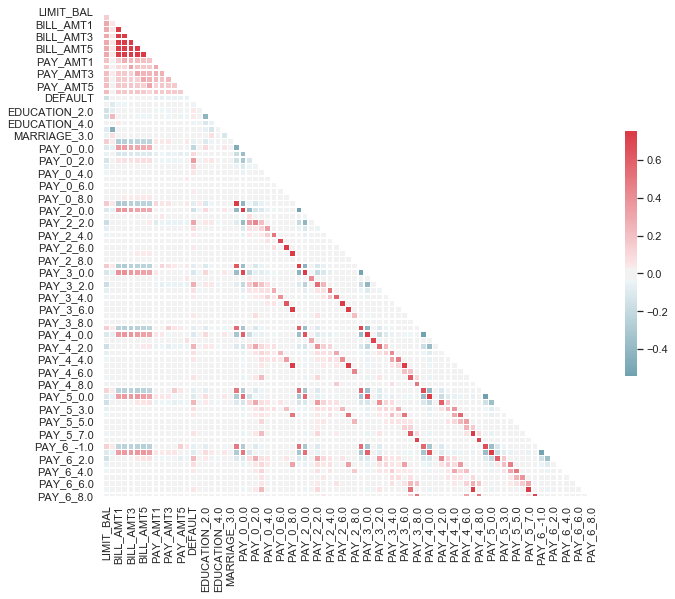

In [19]:
sns.set(style="white")
corr = clean_df.corr() 

mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

f, ax = plt.subplots(figsize=(11, 9))

cmap = sns.diverging_palette(220, 10, as_cmap=True)

sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.75, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5});

## 3. Feature Engineering

In [20]:
clean_df['PAY_RATIO_1'] = (clean_df['PAY_AMT1']/clean_df['BILL_AMT1'])
clean_df['PAY_RATIO_2'] = (clean_df['PAY_AMT2']/clean_df['BILL_AMT2'])
clean_df['PAY_RATIO_3'] = (clean_df['PAY_AMT3']/clean_df['BILL_AMT3'])
clean_df['PAY_RATIO_4'] = (clean_df['PAY_AMT4']/clean_df['BILL_AMT4'])
clean_df['PAY_RATIO_5'] = (clean_df['PAY_AMT5']/clean_df['BILL_AMT5'])
clean_df['PAY_RATIO_6'] = (clean_df['PAY_AMT6']/clean_df['BILL_AMT6'])

In [21]:
clean_df.PAY_RATIO_1.fillna(1, inplace=True)
clean_df.PAY_RATIO_2.fillna(1, inplace=True)
clean_df.PAY_RATIO_3.fillna(1, inplace=True)
clean_df.PAY_RATIO_4.fillna(1, inplace=True)
clean_df.PAY_RATIO_5.fillna(1, inplace=True)
clean_df.PAY_RATIO_6.fillna(1, inplace=True)

In [22]:
clean_df.PAY_RATIO_1 = np.where(((clean_df.PAY_RATIO_1 < 0)|(clean_df.PAY_RATIO_1 > 1)), 1, clean_df.PAY_RATIO_1)
clean_df.PAY_RATIO_2 = np.where(((clean_df.PAY_RATIO_2 < 0)|(clean_df.PAY_RATIO_2 > 1)), 1, clean_df.PAY_RATIO_2)
clean_df.PAY_RATIO_3 = np.where(((clean_df.PAY_RATIO_3 < 0)|(clean_df.PAY_RATIO_3 > 1)), 1, clean_df.PAY_RATIO_3)
clean_df.PAY_RATIO_4 = np.where(((clean_df.PAY_RATIO_4 < 0)|(clean_df.PAY_RATIO_4 > 1)), 1, clean_df.PAY_RATIO_4)
clean_df.PAY_RATIO_5 = np.where(((clean_df.PAY_RATIO_5 < 0)|(clean_df.PAY_RATIO_5 > 1)), 1, clean_df.PAY_RATIO_5)
clean_df.PAY_RATIO_6 = np.where(((clean_df.PAY_RATIO_6 < 0)|(clean_df.PAY_RATIO_6 > 1)), 1, clean_df.PAY_RATIO_6)

In [23]:
clean_df['AVG_BILL_STMT'] = (clean_df['BILL_AMT1']+clean_df['BILL_AMT2']+clean_df['BILL_AMT3']+clean_df['BILL_AMT4']+clean_df['BILL_AMT5']+clean_df['BILL_AMT6'])/6
clean_df['AVG_AMT_PAID'] = (clean_df['PAY_AMT1']+clean_df['PAY_AMT2']+clean_df['PAY_AMT3']+clean_df['PAY_AMT4']+clean_df['PAY_AMT5']+clean_df['PAY_AMT6'])/6


In [24]:
clean_df['PAY_RATIO']= clean_df['AVG_AMT_PAID']/clean_df['AVG_BILL_STMT']

In [25]:
clean_df.PAY_RATIO.fillna(1, inplace=True)
clean_df.replace(np.inf, 1, inplace=True)
clean_df.PAY_RATIO = np.where(((clean_df.PAY_RATIO < 0)|(clean_df.PAY_RATIO > 1)), 1, clean_df.PAY_RATIO)

In [26]:
clean_df.head()

,LIMIT_BAL,AGE,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,DEFAULT,SEX_2.0,EDUCATION_2.0,EDUCATION_3.0,EDUCATION_4.0,MARRIAGE_2.0,MARRIAGE_3.0,PAY_0_-1.0,PAY_0_0.0,PAY_0_1.0,PAY_0_2.0,PAY_0_3.0,PAY_0_4.0,PAY_0_5.0,PAY_0_6.0,PAY_0_7.0,PAY_0_8.0,PAY_2_-1.0,PAY_2_0.0,PAY_2_1.0,PAY_2_2.0,PAY_2_3.0,PAY_2_4.0,PAY_2_5.0,PAY_2_6.0,PAY_2_7.0,PAY_2_8.0,PAY_3_-1.0,PAY_3_0.0,PAY_3_1.0,PAY_3_2.0,PAY_3_3.0,PAY_3_4.0,PAY_3_5.0,PAY_3_6.0,PAY_3_7.0,PAY_3_8.0,PAY_4_-1.0,PAY_4_0.0,PAY_4_1.0,PAY_4_2.0,PAY_4_3.0,PAY_4_4.0,PAY_4_5.0,PAY_4_6.0,PAY_4_7.0,PAY_4_8.0,PAY_5_-1.0,PAY_5_0.0,PAY_5_2.0,PAY_5_3.0,PAY_5_4.0,PAY_5_5.0,PAY_5_6.0,PAY_5_7.0,PAY_5_8.0,PAY_6_-1.0,PAY_6_0.0,PAY_6_2.0,PAY_6_3.0,PAY_6_4.0,PAY_6_5.0,PAY_6_6.0,PAY_6_7.0,PAY_6_8.0,PAY_RATIO_1,PAY_RATIO_2,PAY_RATIO_3,PAY_RATIO_4,PAY_RATIO_5,PAY_RATIO_6,AVG_BILL_STMT,AVG_AMT_PAID,PAY_RATIO
23626,90000.0,36.0,79642.0,79001.0,18318.0,18982.0,19371.0,19608.0,1580.0,19789.0,1295.0,1000.0,849.0,1000.0,0.0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0.019839,0.250491,0.070695,0.052681,0.043828,0.051000,39153.666667,4252.166667,0.108602
9489,90000.0,25.0,6822.0,6995.0,7884.0,0.0,0.0,0.0,1172.0,1061.0,0.0,0.0,0.0,193.0,1.0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.171797,0.151680,0.000000,1.000000,1.000000,1.000000,3616.833333,404.333333,0.111792
27783,90000.0,25.0,6090.0,7477.0,8848.0,10135.0,11731.0,8138.0,1500.0,1500.0,1500.0,2000.0,1500.0,1000.0,0.0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0.246305,0.200615,0.169530,0.197336,0.127866,0.122880,8736.500000,1500.000000,0.171693
1940,90000.0,30.0,38921.0,45577.0,46496.0,40244.0,39903.0,8629.0,12000.0,5000.0,3000.0,10000.0,1000.0,1838.0,0.0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0.308317,0.109704,0.064522,0.248484,0.025061,0.213003,36628.333333,5473.000000,0.149420
18657,90000.0,26.0,86335.0,88520.0,90311.0,91431.0,92840.0,91205.0,4500.0,4100.0,3500.0,3800.0,0.0,3500.0,0.0,1,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0.052123,0.046317,0.038755,0.041561,0.000000,0.038375,90107.000000,3233.333333,0.035883


In [27]:
clean_df.describe()

,LIMIT_BAL,AGE,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,DEFAULT,SEX_2.0,EDUCATION_2.0,EDUCATION_3.0,EDUCATION_4.0,MARRIAGE_2.0,MARRIAGE_3.0,PAY_0_-1.0,PAY_0_0.0,PAY_0_1.0,PAY_0_2.0,PAY_0_3.0,PAY_0_4.0,PAY_0_5.0,PAY_0_6.0,PAY_0_7.0,PAY_0_8.0,PAY_2_-1.0,PAY_2_0.0,PAY_2_1.0,PAY_2_2.0,PAY_2_3.0,PAY_2_4.0,PAY_2_5.0,PAY_2_6.0,PAY_2_7.0,PAY_2_8.0,PAY_3_-1.0,PAY_3_0.0,PAY_3_1.0,PAY_3_2.0,PAY_3_3.0,PAY_3_4.0,PAY_3_5.0,PAY_3_6.0,PAY_3_7.0,PAY_3_8.0,PAY_4_-1.0,PAY_4_0.0,PAY_4_1.0,PAY_4_2.0,PAY_4_3.0,PAY_4_4.0,PAY_4_5.0,PAY_4_6.0,PAY_4_7.0,PAY_4_8.0,PAY_5_-1.0,PAY_5_0.0,PAY_5_2.0,PAY_5_3.0,PAY_5_4.0,PAY_5_5.0,PAY_5_6.0,PAY_5_7.0,PAY_5_8.0,PAY_6_-1.0,PAY_6_0.0,PAY_6_2.0,PAY_6_3.0,PAY_6_4.0,PAY_6_5.0,PAY_6_6.0,PAY_6_7.0,PAY_6_8.0,PAY_RATIO_1,PAY_RATIO_2,PAY_RATIO_3,PAY_RATIO_4,PAY_RATIO_5,PAY_RATIO_6,AVG_BILL_STMT,AVG_AMT_PAID,PAY_RATIO
count,22499.000000,22499.000000,22499.000000,22499.000000,2.249900e+04,22499.000000,22499.000000,22499.000000,22499.000000,2.249900e+04,22499.000000,22499.000000,22499.000000,22499.000000,22499.000000,22499.000000,22499.000000,22499.000000,22499.000000,22499.000000,22499.000000,22499.000000,22499.000000,22499.000000,22499.000000,22499.000000,22499.000000,22499.000000,22499.000000,22499.000000,22499.000000,22499.000000,22499.000000,22499.000000,22499.000000,22499.000000,22499.000000,22499.000000,22499.000000,22499.000000,22499.000000,22499.000000,22499.000000,22499.000000,22499.000000,22499.000000,22499.000000,22499.000000,22499.000000,22499.000000,22499.000000,22499.000000,22499.000000,22499.000000,22499.000000,22499.000000,22499.000000,22499.000000,22499.000000,22499.000000,22499.000000,22499.000000,22499.000000,22499.000000,22499.000000,22499.000000,22499.000000,22499.000000,22499.000000,22499.000000,22499.000000,22499.000000,22499.000000,22499.000000,22499.000000,22499.000000,22499.000000,22499.000000,22499.000000,22499.000000,22499.000000,22499.000000,22499.000000,22499.000000,22499.000000,22499.000000,22499.000000,22499.000000
mean,167054.521534,35.447931,51455.869416,49385.313214,4.704213e+04,43329.149562,40306.373039,38955.000356,5627.914796,5.964393e+03,5258.912307,4792.971777,4865.656029,5247.279301,0.223477,0.603227,0.467399,0.165030,0.015601,0.534513,0.012356,0.189875,0.491444,0.122228,0.090315,0.010623,0.002267,0.000889,0.000400,0.000267,0.000667,0.201164,0.524646,0.001067,0.131873,0.011156,0.003111,0.000844,0.000356,0.000711,0.000044,0.198409,0.525490,0.000178,0.128495,0.007867,0.002578,0.000667,0.000844,0.000978,0.000089,0.190275,0.548024,0.000089,0.106227,0.006134,0.002178,0.001244,0.000222,0.002089,0.000089,0.183297,0.564736,0.089515,0.005689,0.002622,0.000711,0.000133,0.002089,0.000044,0.190408,0.543713,0.092360,0.006222,0.001689,0.000400,0.000622,0.001689,0.000089,0.303204,0.315860,0.311864,0.306397,0.328164,0.348377,45078.972125,5292.854497,0.344726
std,129864.960118,9.237634,74470.257248,71953.814345,6.991792e+04,64607.088483,60918.993067,59773.144959,16628.162287,2.444370e+04,18153.554633,15872.858180,15507.449610,17892.327398,0.416584,0.489239,0.498947,0.371215,0.123927,0.498819,0.110472,0.392211,0.499938,0.327556,0.286639,0.102520,0.047558,0.029802,0.019997,0.016328,0.025812,0.400880,0.499403,0.032644,0.338360,0.105034,0.055693,0.029048,0.018854,0.026658,0.006667,0.398811,0.499361,0.013333,0.334647,0.088349,0.050709,0.025812,0.029048,0.031256,0.009428,0.392527,0.497699,0.009428,0.308135,0.078079,0.046618,0.035256,0.014906,0.045659,0.009428,0.386918,0.495803,0.285492,0.075213,0.051143,0.026658,0.011547,0.045659,0.006667,0.392632,0.498097,0.289539,0.078639,0.041063,0.019997,0.024938,0.041063,0.009428,0.392584,0.401119,0.407479,0.408008,0.417028,0.425910,63716.533656,10528.220177,0.380805
min,10000.000000,21.000000,-165580.000000,-69777.000000,-1.572640e+05,-81334.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000

## 4. Feature Selection

In [28]:
target = clean_df['DEFAULT']
features = clean_df.drop(['DEFAULT'], axis=1)

In [29]:
X_train_fs, X_test_fs, y_train_fs, y_test_fs = train_test_split(features, target, random_state=22,test_size=0.20)

In [30]:
scaler = StandardScaler()
# fit the scaler to the training data
scaler.fit(X_train_fs)
#transform the training data
X_train_fs = pd.DataFrame(data = scaler.transform(X_train_fs), columns = features.columns)
#transform the testing data
X_test_fs = pd.DataFrame(data = scaler.transform(X_test_fs), columns = features.columns)

In [31]:
## training the model
from sklearn.linear_model import Lasso
lasso = Lasso(alpha = 0.01, normalize = False)
lasso = lasso.fit(X_train_fs, y_train_fs)
y_train_pred_fs = lasso.predict(X_train_fs)
y_pred_fs = lasso.predict(X_test_fs)
train_rmse_fs = np.sqrt(metrics.mean_squared_error(y_train_fs, y_train_pred_fs))
test_rmse_fs = np.sqrt(metrics.mean_squared_error(y_test_fs, y_pred_fs))
print('Training Root Mean Squared Error:' , train_rmse_fs)
print("Testing Rooot Mean Squared Error:" , test_rmse_fs)
# print ("R^2 Score:", lasso.score(y_train, y_train_pred))
print ("R^2 Train Score:", metrics.r2_score(y_train_fs, (y_train_pred_fs)))
print("R^2 Test Score:", metrics.r2_score(y_test_fs, y_pred_fs))

Training Root Mean Squared Error: 0.3733665864933406
Testing Rooot Mean Squared Error: 0.36789937796376926
R^2 Train Score: 0.19734771596730039
R^2 Test Score: 0.2174625790902156


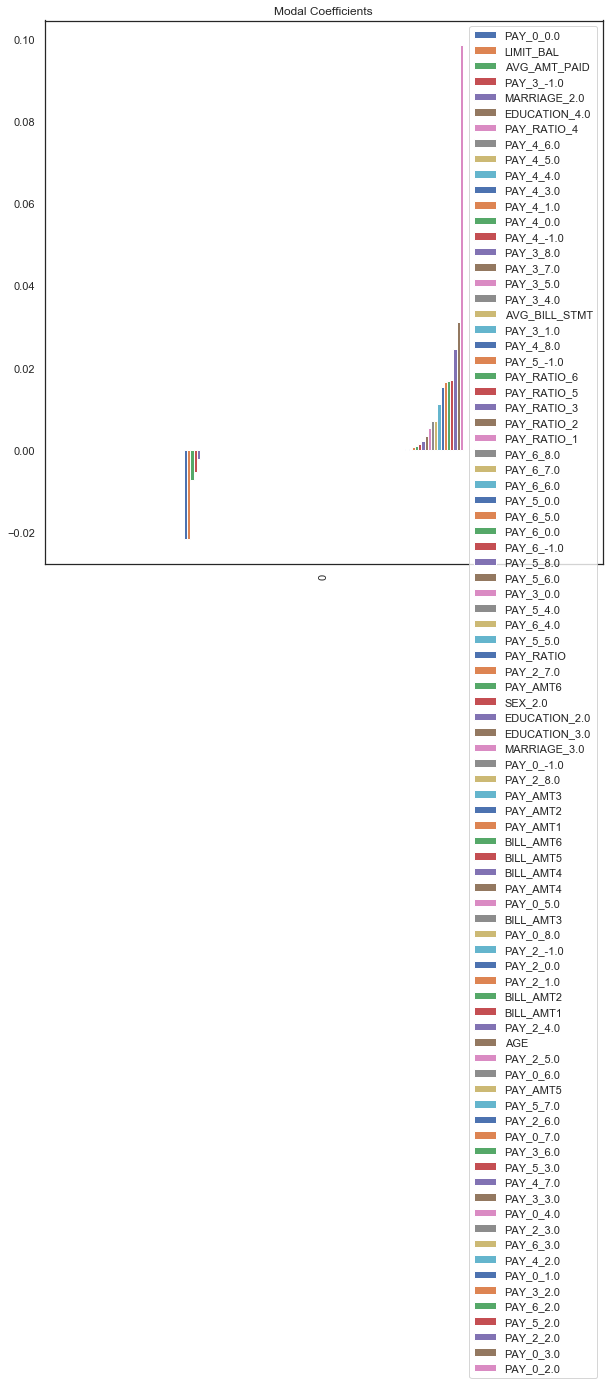

In [44]:
lasso_coef01 = pd.DataFrame(data=lasso.coef_).T
lasso_coef01.columns = X_train_fs.columns
lasso_coef01 = lasso_coef01.T.sort_values(by=0).T
lasso_coef01.plot(kind='bar', title='Modal Coefficients', legend=True, figsize=(10,10))

In [50]:
# assemble non-zero coefs
coef_keep = []
for i in lasso_coef01:
    for j in lasso_coef01[i]:
        if j > 0.0:
            coef_keep.append(i)
        elif j < 0.0:
            coef_keep.append(i)   


In [49]:
coef_keep # len =24

['PAY_0_0.0',
 'LIMIT_BAL',
 'AVG_AMT_PAID',
 'PAY_3_-1.0',
 'MARRIAGE_2.0',
 'EDUCATION_4.0',
 'PAY_5_7.0',
 'PAY_2_6.0',
 'PAY_0_7.0',
 'PAY_3_6.0',
 'PAY_5_3.0',
 'PAY_4_7.0',
 'PAY_3_3.0',
 'PAY_0_4.0',
 'PAY_2_3.0',
 'PAY_6_3.0',
 'PAY_4_2.0',
 'PAY_0_1.0',
 'PAY_3_2.0',
 'PAY_6_2.0',
 'PAY_5_2.0',
 'PAY_2_2.0',
 'PAY_0_3.0',
 'PAY_0_2.0']

In [23]:
working_df = clean_df[['DEFAULT','PAY_0_0.0','LIMIT_BAL','AVG_AMT_PAID','PAY_3_-1.0','MARRIAGE_2.0','EDUCATION_4.0','PAY_5_7.0','PAY_2_6.0','PAY_0_7.0','PAY_3_6.0','PAY_5_3.0','PAY_4_7.0','PAY_3_3.0','PAY_0_4.0','PAY_2_3.0','PAY_6_3.0','PAY_4_2.0','PAY_0_1.0','PAY_3_2.0','PAY_6_2.0','PAY_5_2.0','PAY_2_2.0','PAY_0_3.0','PAY_0_2.0']]

In [2]:
working_df.head()

NameError: name 'working_df' is not defined

## 5. Model Fitting and Hyperparameter Tuning
KNN, Logistic Regression, Decision Tree

In [33]:
target = working_df['DEFAULT']
features = working_df.drop(['DEFAULT'], axis=1)

In [34]:
X_train, X_test, y_train, y_test = train_test_split(features, target, random_state=22,test_size=0.20)

In [35]:
scaler = StandardScaler()
# fit the scaler to the training data
scaler.fit(X_train)
#transform the training data
X_train = pd.DataFrame(data = scaler.transform(X_train), columns = features.columns)
#transform the testing data
X_test = pd.DataFrame(data = scaler.transform(X_test), columns = features.columns)

### KNN

In [36]:
knn = KNeighborsClassifier(n_neighbors=9)

In [51]:
knn.fit(X_train, y_train)

knn_preds = knn.predict(X_test)

knn_f1 = metrics.f1_score(y_test, knn_preds)

knn_acc = metrics.accuracy_score(y_test, knn_preds)

print('Test F1 score: ', knn_f1)
print('Test Accuracy score: ', knn_acc)

Test F1 score:  0.4742396027312229
Test Accuracy score:  0.8117777777777778


### Logistic Regression

In [38]:
lr = LogisticRegression(class_weight='balanced')

In [39]:
lr.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight='balanced', dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [52]:
lr_preds = lr.predict(X_test)

lr_f1 = metrics.f1_score(y_test, lr_preds)

lr_acc = metrics.accuracy_score(y_test, lr_preds)

print('Test F1 score: ', lr_f1)
print('Test Accuracy score: ', lr_acc)

Test F1 score:  0.5546461242176216
Test Accuracy score:  0.7944444444444444


### Decision Tree

In [53]:
dtc = DecisionTreeClassifier(max_depth=5, class_weight='balanced')

dtc.fit(X_train, y_train)

dtc_preds  = dtc.predict(X_test)

dtc_f1 = metrics.f1_score(y_test, dtc_preds)

dtc_acc = metrics.accuracy_score(y_test, dtc_preds)

print('Test F1 score: ', dtc_f1)
print('Test Accuracy score: ', dtc_acc)

Test F1 score:  0.5217391304347825
Test Accuracy score:  0.7702222222222223


### Random Forest

In [48]:
# Instantiate the classifier using 100 trees
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(random_state = 1, n_estimators=100, max_depth=9, max_features=3)

In [49]:
#fit the model to the training data
rfc.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=9, max_features=3,
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=1, verbose=0,
                       warm_start=False)

In [50]:
#use the fitted model to predict on the test data
rfc_preds = rfc.predict(X_test)

rfc_f1 = metrics.f1_score(y_test, rfc_preds)
rfc_acc = metrics.accuracy_score(y_test, rfc_preds)

# checking accuracy on the test data
print('Test F1 score: ', rfc_f1)
print('Test Accuracy score: ', rfc_acc)

Test F1 score:  0.46277665995975853
Test Accuracy score:  0.822


## 6. Model Evaluation

### Voting Classifier

In [54]:
from sklearn.ensemble import VotingClassifier


In [59]:
voting_clf = VotingClassifier(
                estimators=[('knneighbors', knn), ('logreg', lr), ('decisiontree', dtc)], 
                voting='soft')

voting_clf.fit(X_train, y_train)

vc_preds = voting_clf.predict(X_test)

vc_f1 = metrics.f1_score(y_test, vc_preds)

vc_acc = metrics.accuracy_score(y_test, vc_preds)

print('Test F1 score: ', vc_f1)
print('Test Accuracy score: ', vc_acc)

Test F1 score:  0.5540106951871658
Test Accuracy score:  0.8146666666666667


### Gridsearch CV - Logistic Regression

In [60]:
from sklearn.model_selection import GridSearchCV

In [61]:
#create a dictionary of all the parameters you want to tune
param_grid = { 
    'C':[0.001,0.01,0.1,1],
    'penalty':['l1', 'l2']
}

In [62]:
lr_CV = LogisticRegression(random_state = 1, class_weight='balanced')

In [63]:
#create a grid search object and fit it to the data

lr_CV = GridSearchCV(estimator=lr_CV, param_grid=param_grid, cv= 5, scoring='f1', verbose=1, n_jobs=-1)
lr_CV.fit(X_train, y_train)

Fitting 5 folds for each of 8 candidates, totalling 40 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    3.9s finished


GridSearchCV(cv=5, error_score=nan,
             estimator=LogisticRegression(C=1.0, class_weight='balanced',
                                          dual=False, fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='auto',
                                          n_jobs=None, penalty='l2',
                                          random_state=1, solver='lbfgs',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='deprecated', n_jobs=-1,
             param_grid={'C': [0.001, 0.01, 0.1, 1], 'penalty': ['l1', 'l2']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='f1', verbose=1)

In [64]:
### Identify the best params 
print(lr_CV.best_params_)
print(lr_CV.best_estimator_)


#Identify the best score during fitting with cross-validation
print(lr_CV.best_score_)


{'C': 0.001, 'penalty': 'l2'}
LogisticRegression(C=0.001, class_weight='balanced', dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=1, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)
0.5256760504729


In [65]:
#predict on the test set
test_preds_lr_CV = lr_CV.best_estimator_.predict(X_test)

# checking accuracy and F1
print("Accuracy:",metrics.accuracy_score(y_test, test_preds_lr_CV))
print("F1:",metrics.f1_score(y_test, test_preds_lr_CV))

Accuracy: 0.8002222222222222
F1: 0.5603911980440097


In [67]:
voting_clf = VotingClassifier(
                estimators=[('knneighbors', knn), ('logreg', lr), ('decisiontree', dtc), ('randomforest', rfc), ('logregCV', lr_CV)], 
                voting='hard')

voting_clf.fit(X_train, y_train)

vc_preds = voting_clf.predict(X_test)

vc_f1 = metrics.f1_score(y_test, vc_preds)

vc_acc = metrics.accuracy_score(y_test, vc_preds)

print('Test F1 score: ', vc_f1)
print('Test Accuracy score: ', vc_acc)

Fitting 5 folds for each of 8 candidates, totalling 40 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.8s finished


Test F1 score:  0.5510416666666667
Test Accuracy score:  0.8084444444444444


### Gridsearch CV - Random Forest

In [68]:
from sklearn.model_selection import GridSearchCV

In [ ]:
#{'criterion': 'gini', 'max_depth': 5, 'max_features': 0.25, 'n_estimators': 400}

In [69]:
#create a dictionary of all the parameters you want to tune
param_grid2 = { 
    'n_estimators': [100, 200, 300, 400],
    'max_features': [.25, .5, .75],
    'max_depth' : [5, 10, 15],
    'criterion' : ['gini','entropy']
    
}

In [70]:
rfc_CV = RandomForestClassifier(random_state = 1, class_weight='balanced')

In [71]:
#create a grid search object and fit it to the data

rfc_CV = GridSearchCV(estimator=rfc_CV, param_grid=param_grid2, cv= 7, scoring='f1', verbose=1, n_jobs=-1)
rfc_CV.fit(X_train, y_train)

Fitting 7 folds for each of 72 candidates, totalling 504 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   49.5s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:  7.2min
[Parallel(n_jobs=-1)]: Done 442 tasks      | elapsed: 19.2min
[Parallel(n_jobs=-1)]: Done 504 out of 504 | elapsed: 23.8min finished


GridSearchCV(cv=7, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight='balanced',
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False, random_state=1,
                             

In [72]:
### Identify the best params 
print(rfc_CV.best_params_)
print(rfc_CV.best_estimator_)


#Identify the best score during fitting with cross-validation
print(rfc_CV.best_score_)


{'criterion': 'gini', 'max_depth': 5, 'max_features': 0.25, 'n_estimators': 400}
RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight='balanced',
                       criterion='gini', max_depth=5, max_features=0.25,
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=400,
                       n_jobs=None, oob_score=False, random_state=1, verbose=0,
                       warm_start=False)
0.5356697668346267


In [73]:
#predict on the test set
test_preds_rfc_CV = rfc_CV.best_estimator_.predict(X_test)

# checking accuracy and F1
print("Accuracy:",metrics.accuracy_score(y_test, test_preds_rfc_CV))
print("F1:",metrics.f1_score(y_test, test_preds_rfc_CV))


Accuracy: 0.7953333333333333
F1: 0.5657708628005658


In [ ]:
#1 {'criterion': 'gini', 'max_depth': 5, 'max_features': 0.25, 'n_estimators': 400}
#2 {'criterion': 'gini', 'max_depth': 7, 'max_features': 0.2, 'n_estimators': 400}

In [74]:
#create a dictionary of all the parameters you want to tune
param_grid3 = { 
    'n_estimators': [400, 500],
    'max_features': [.2, .25],
    'max_depth' : [4, 5, 6, 7],
    'criterion' : ['gini']
    
}

In [75]:
rfc_CV2 = RandomForestClassifier(random_state = 1, class_weight='balanced')

In [76]:
#create a grid search object and fit it to the data

rfc_CV2 = GridSearchCV(estimator=rfc_CV2, param_grid=param_grid3, cv= 7, scoring='f1', verbose=1, n_jobs=-1)
rfc_CV2.fit(X_train, y_train)

Fitting 7 folds for each of 16 candidates, totalling 112 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done 112 out of 112 | elapsed:  3.7min finished


GridSearchCV(cv=7, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight='balanced',
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False, random_state=1,
                             

In [77]:
### Identify the best params 
print(rfc_CV2.best_params_)
print(rfc_CV2.best_estimator_)


#Identify the best score during fitting with cross-validation
print(rfc_CV2.best_score_)


{'criterion': 'gini', 'max_depth': 7, 'max_features': 0.2, 'n_estimators': 400}
RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight='balanced',
                       criterion='gini', max_depth=7, max_features=0.2,
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=400,
                       n_jobs=None, oob_score=False, random_state=1, verbose=0,
                       warm_start=False)
0.5369756833143136


In [78]:
#predict on the test set
test_preds_rfc_CV2 = rfc_CV2.best_estimator_.predict(X_test)

# checking accuracy and F1
print("Accuracy:",metrics.accuracy_score(y_test, test_preds_rfc_CV2))
print("F1:",metrics.f1_score(y_test, test_preds_rfc_CV2))


Accuracy: 0.7933333333333333
F1: 0.5625587958607714


In [94]:
# Instantiate the classifier using 100 trees
from sklearn.ensemble import RandomForestClassifier
rfc2 = RandomForestClassifier(random_state = 1, n_estimators=400, max_depth=5, max_features=.25, criterion='gini', class_weight='balanced')

In [95]:
#fit the model to the training data
rfc2.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight='balanced',
                       criterion='gini', max_depth=5, max_features=0.25,
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=400,
                       n_jobs=None, oob_score=False, random_state=1, verbose=0,
                       warm_start=False)

In [96]:
#use the fitted model to predict on the test data
rfc2_preds = rfc2.predict(X_test)

rfc2_f1 = metrics.f1_score(y_test, rfc2_preds)
rfc2_acc = metrics.accuracy_score(y_test, rfc2_preds)

# checking accuracy on the test data
print('Test F1 score: ', rfc2_f1)
print('Test Accuracy score: ', rfc2_acc)

Test F1 score:  0.5657708628005658
Test Accuracy score:  0.7953333333333333


In [101]:
voting_clf = VotingClassifier(
                estimators=[('knneighbors', knn), ('logreg', lr_CV), ('decisiontree', dtc), ('randomforest', rfc2)], 
                voting='soft')

voting_clf.fit(X_train, y_train)

vc_preds = voting_clf.predict(X_test)

vc_f1 = metrics.f1_score(y_test, vc_preds)

vc_acc = metrics.accuracy_score(y_test, vc_preds)

print('Test F1 score: ', vc_f1)
print('Test Accuracy score: ', vc_acc)

Fitting 5 folds for each of 8 candidates, totalling 40 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.9s finished


Test F1 score:  0.5614583333333332
Test Accuracy score:  0.8128888888888889


## 7. Final Model

In [129]:
df1 = pd.read_csv('holdout_data.csv', index_col=0)

In [130]:
df1.head()

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11,X12,X13,X14,X15,X16,X17,X18,X19,X20,X21,X22,X23
5501,180000,2,2,1,44,0,0,0,0,0,0,161186,167080,170788,174764,162667,166953,10000,8000,7000,6000,7000,10000
28857,130000,2,2,1,48,-2,-2,-2,-2,-2,-2,0,1240,1487,1279,749,440,1240,1487,1279,749,440,849
11272,60000,2,1,1,43,-1,3,2,0,0,-1,495,330,495,330,165,340,0,330,0,0,340,0
8206,240000,1,1,1,42,0,0,0,0,0,0,72339,91045,91027,51508,51127,0,20000,2213,1030,1023,6790,10893
6362,100000,2,2,1,28,2,0,0,0,0,2,73073,74739,70844,63924,57326,59654,3500,3003,1910,2400,3300,0


In [ ]:
#headers = df_blah.drop(columns='Y').loc['ID']

In [171]:
df_blah.head()

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11,X12,X13,X14,X15,X16,X17,X18,X19,X20,X21,X22,X23,Y
28835,220000,2,1,2,36,0,0,0,0,0,0,222598,222168,217900,221193,181859,184605,10000,8018,10121,6006,10987,143779,1
25329,200000,2,3,2,29,-1,-1,-1,-1,-1,-1,326,326,326,326,326,326,326,326,326,326,326,326,0
18894,180000,2,1,2,27,-2,-2,-2,-2,-2,-2,0,0,0,0,0,0,0,0,0,0,0,0,0
690,80000,1,2,2,32,0,0,0,0,0,0,51372,51872,47593,43882,42256,42527,1853,1700,1522,1548,1488,1500,0
6239,10000,1,2,2,27,0,0,0,0,0,0,8257,7995,4878,5444,2639,2697,2000,1100,600,300,300,1000,1


In [147]:
df1.columns = df_blah.drop(columns='Y').loc['ID']

In [150]:
df = df1

In [167]:
df.head()

ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
5501,180000,2,2,1,44,0,0,0,0,0,0,161186,167080,170788,174764,162667,166953,10000,8000,7000,6000,7000,10000
28857,130000,2,2,1,48,-2,-2,-2,-2,-2,-2,0,1240,1487,1279,749,440,1240,1487,1279,749,440,849
11272,60000,2,1,1,43,-1,3,2,0,0,-1,495,330,495,330,165,340,0,330,0,0,340,0
8206,240000,1,1,1,42,0,0,0,0,0,0,72339,91045,91027,51508,51127,0,20000,2213,1030,1023,6790,10893
6362,100000,2,2,1,28,2,0,0,0,0,2,73073,74739,70844,63924,57326,59654,3500,3003,1910,2400,3300,0


In [156]:
data = df.astype(float)
data['EDUCATION']=np.where(data['EDUCATION']>4,4,data['EDUCATION'])
data['EDUCATION']=np.where(data['EDUCATION']<1,4,data['EDUCATION'])
data['MARRIAGE']=np.where(data['MARRIAGE']<1,3,data['MARRIAGE'])

In [157]:
clean_df = pd.get_dummies(data, columns=['SEX', 'EDUCATION', 'MARRIAGE', 'PAY_0', 'PAY_2',
       'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6'], drop_first=True)

In [158]:
clean_df['PAY_RATIO_1'] = (clean_df['PAY_AMT1']/clean_df['BILL_AMT1'])
clean_df['PAY_RATIO_2'] = (clean_df['PAY_AMT2']/clean_df['BILL_AMT2'])
clean_df['PAY_RATIO_3'] = (clean_df['PAY_AMT3']/clean_df['BILL_AMT3'])
clean_df['PAY_RATIO_4'] = (clean_df['PAY_AMT4']/clean_df['BILL_AMT4'])
clean_df['PAY_RATIO_5'] = (clean_df['PAY_AMT5']/clean_df['BILL_AMT5'])
clean_df['PAY_RATIO_6'] = (clean_df['PAY_AMT6']/clean_df['BILL_AMT6'])


In [159]:
clean_df.PAY_RATIO_1.fillna(1, inplace=True)
clean_df.PAY_RATIO_2.fillna(1, inplace=True)
clean_df.PAY_RATIO_3.fillna(1, inplace=True)
clean_df.PAY_RATIO_4.fillna(1, inplace=True)
clean_df.PAY_RATIO_5.fillna(1, inplace=True)
clean_df.PAY_RATIO_6.fillna(1, inplace=True)

In [160]:
clean_df.PAY_RATIO_1 = np.where(((clean_df.PAY_RATIO_1 < 0)|(clean_df.PAY_RATIO_1 > 1)), 1, clean_df.PAY_RATIO_1)
clean_df.PAY_RATIO_2 = np.where(((clean_df.PAY_RATIO_2 < 0)|(clean_df.PAY_RATIO_2 > 1)), 1, clean_df.PAY_RATIO_2)
clean_df.PAY_RATIO_3 = np.where(((clean_df.PAY_RATIO_3 < 0)|(clean_df.PAY_RATIO_3 > 1)), 1, clean_df.PAY_RATIO_3)
clean_df.PAY_RATIO_4 = np.where(((clean_df.PAY_RATIO_4 < 0)|(clean_df.PAY_RATIO_4 > 1)), 1, clean_df.PAY_RATIO_4)
clean_df.PAY_RATIO_5 = np.where(((clean_df.PAY_RATIO_5 < 0)|(clean_df.PAY_RATIO_5 > 1)), 1, clean_df.PAY_RATIO_5)
clean_df.PAY_RATIO_6 = np.where(((clean_df.PAY_RATIO_6 < 0)|(clean_df.PAY_RATIO_6 > 1)), 1, clean_df.PAY_RATIO_6)

In [161]:
clean_df['AVG_BILL_STMT'] = (clean_df['BILL_AMT1']+clean_df['BILL_AMT2']+clean_df['BILL_AMT3']+clean_df['BILL_AMT4']+clean_df['BILL_AMT5']+clean_df['BILL_AMT6'])/6
clean_df['AVG_AMT_PAID'] = (clean_df['PAY_AMT1']+clean_df['PAY_AMT2']+clean_df['PAY_AMT3']+clean_df['PAY_AMT4']+clean_df['PAY_AMT5']+clean_df['PAY_AMT6'])/6


In [162]:
clean_df['PAY_RATIO']= clean_df['AVG_AMT_PAID']/clean_df['AVG_BILL_STMT']

In [163]:
clean_df.PAY_RATIO.fillna(1, inplace=True)
clean_df.replace(np.inf, 1, inplace=True)
clean_df.PAY_RATIO = np.where(((clean_df.PAY_RATIO < 0)|(clean_df.PAY_RATIO > 1)), 1, clean_df.PAY_RATIO)

In [165]:
working_df = clean_df[['PAY_0_0.0','LIMIT_BAL','AVG_AMT_PAID','PAY_3_-1.0','MARRIAGE_2.0','EDUCATION_4.0','PAY_5_7.0','PAY_2_6.0','PAY_0_7.0','PAY_3_6.0','PAY_5_3.0','PAY_4_7.0','PAY_3_3.0','PAY_0_4.0','PAY_2_3.0','PAY_6_3.0','PAY_4_2.0','PAY_0_1.0','PAY_3_2.0','PAY_6_2.0','PAY_5_2.0','PAY_2_2.0','PAY_0_3.0','PAY_0_2.0']]

In [166]:
working_df.head()

,PAY_0_0.0,LIMIT_BAL,AVG_AMT_PAID,PAY_3_-1.0,MARRIAGE_2.0,EDUCATION_4.0,PAY_5_7.0,PAY_2_6.0,PAY_0_7.0,PAY_3_6.0,PAY_5_3.0,PAY_4_7.0,PAY_3_3.0,PAY_0_4.0,PAY_2_3.0,PAY_6_3.0,PAY_4_2.0,PAY_0_1.0,PAY_3_2.0,PAY_6_2.0,PAY_5_2.0,PAY_2_2.0,PAY_0_3.0,PAY_0_2.0
5501,1,180000.0,8000.000000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
28857,0,130000.0,1007.333333,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
11272,0,60000.0,111.666667,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0
8206,1,240000.0,6991.500000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
6362,0,100000.0,2352.166667,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1


In [168]:
scaled_df = pd.DataFrame(data = scaler.transform(working_df), columns = working_df.columns)

In [172]:
rfc2.predict(scaled_df)

array([0., 0., 1., ..., 1., 1., 1.])

In [173]:
yhat = rfc2.predict(scaled_df)

In [170]:
rfc2.predict(scaled_df).mean()

0.2445007332355686

In [174]:
np.savetxt('default_preds_TH.csv', yhat, delimiter=",")

In [175]:
pd.DataFrame(yhat).to_csv("default_preds_TH.csv", header=None)